In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)

df = pd.read_csv('Datasets/Curated-1000-IT-NL.tsv', sep='\t')
df.head()

,it_id,italian,nl_id,dutch
0,3251644,Lascia in pace Tom.,3039369,Laat Tom met rust.
1,375394,È venuto di persona.,8088522,Hij kwam persoonlijk.
2,3810675,Rimaniamo sposate.,10890498,Laten we getrouwd blijven.
3,1803145,Ha due sorelle.,1478759,Hij heeft twee zussen.
4,2020911,Vuole sposare mia figlia.,4284577,Hij wil met mijn dochter trouwen.


## Word Lengths

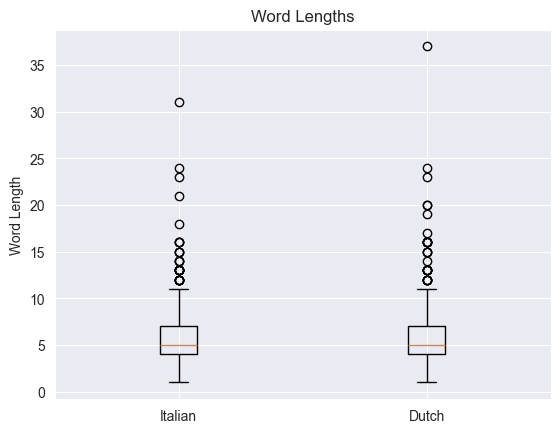

{'italian': 5.643, 'dutch': 5.985}

In [2]:
df['italian_length'] = df['italian'].apply(lambda x: len(x.split()))
df['dutch_length'] = df['dutch'].apply(lambda x: len(x.split()))

avg_italian_length = df['italian_length'].mean()
avg_dutch_length = df['dutch_length'].mean()

# Display averages
average_lengths = {'italian': float(avg_italian_length), 'dutch': float(avg_dutch_length)}

# Prepare data for boxplot
boxplot_data = [df['italian_length'], df['dutch_length']]

# Boxplot
plt.boxplot(boxplot_data, tick_labels=['Italian', 'Dutch'])
plt.title('Word Lengths')
plt.ylabel('Word Length')
plt.show()

average_lengths

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


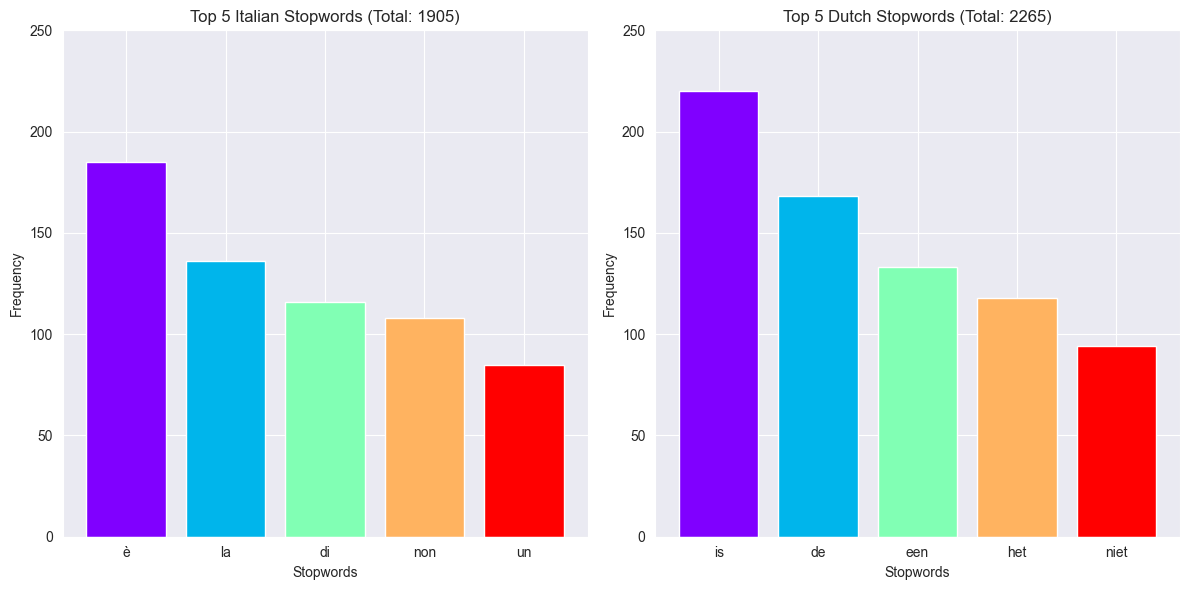

(2265, 1905)

In [3]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Download the stopwords dataset
nltk.download('stopwords')

# Define stopwords sets for Dutch and Italian
nl_stop = set(stopwords.words('dutch'))
it_stop = set(stopwords.words('italian'))

# Initialize counters
nl_stopwords_counter = Counter()
it_stopwords_counter = Counter()

# Count stopwords
for i in range(len(df)):
    nl_words = [word for word in df['dutch'][i].split() if word in nl_stop]
    it_words = [word for word in df['italian'][i].split() if word in it_stop]
    nl_stopwords_counter.update(nl_words)
    it_stopwords_counter.update(it_words)

# Total number of stopwords
total_nl_stopwords = sum(nl_stopwords_counter.values())
total_it_stopwords = sum(it_stopwords_counter.values())

# Get top 5 stopwords by frequency
top_5_nl_stopwords = nl_stopwords_counter.most_common(5)
top_5_it_stopwords = it_stopwords_counter.most_common(5)

# Convert stopwords data to separate lists for plotting
nl_words, nl_counts = zip(*top_5_nl_stopwords) if top_5_nl_stopwords else ([], [])
it_words, it_counts = zip(*top_5_it_stopwords) if top_5_it_stopwords else ([], [])

# Plotting the stopwords
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
colors = it_colors = cm.rainbow(np.linspace(0, 1, 5))

# Italian stopwords
ax[0].bar(it_words, it_counts, color=colors)
ax[0].set_title(f'Top 5 Italian Stopwords (Total: {total_it_stopwords})')
ax[0].set_xlabel('Stopwords')
ax[0].set_ylabel('Frequency')
ax[0].set_ylim(0, 250)

# Dutch stopwords
ax[1].bar(nl_words, nl_counts, color=colors)
ax[1].set_title(f'Top 5 Dutch Stopwords (Total: {total_nl_stopwords})')
ax[1].set_xlabel('Stopwords')
ax[1].set_ylabel('Frequency')
ax[1].set_ylim(0, 250)

plt.tight_layout()
plt.show()

total_nl_stopwords, total_it_stopwords

## Part of Speech (POS) Tagging

In [4]:
import pandas as pd
import spacy
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

def plot_parts_of_speech_barchart(df, text_column, language='it'):  
    """
    Plot the most common POS tags from a text column in a Pandas DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the text data.
        text_column (str): The name of the column with the text to analyze.
        language (str): The language of the text ('it' for Italian, 'nl' for Dutch).
    """
    # Load the appropriate spaCy language model
    if language == 'it':
        lan = 'Italian'
        nlp = spacy.load('it_core_news_sm')  # Italian model
    elif language == 'nl':
        lan = 'Dutch'
        nlp = spacy.load('nl_core_news_sm')  # Dutch model
    else:
        raise ValueError("Unsupported language. Use 'it' for Italian or 'nl' for Dutch.")

    # Process the text column and extract POS tags
    def extract_pos_tags(text):
        doc = nlp(text)
        return [token.pos_ for token in doc]  # Extract POS tags
    
    # Apply POS tagging to each row
    df['pos_tags'] = df[text_column].apply(extract_pos_tags)

    # Flatten the list of POS tags from all rows
    all_tags = [tag for tags in df['pos_tags'] for tag in tags]

    # Count the most common POS tags
    counter = Counter(all_tags)
    print(counter)
    x, y = list(map(list, zip(*counter.most_common(7))))

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=y, y=x, hue=x, palette='rainbow', dodge=False, legend=False)
    plt.title(f"Top POS Tags in {lan} Text")
    plt.xlabel("Frequency")
    plt.ylabel("POS Tags")
    plt.xlim(0, 1200)
    plt.show()

Counter({'PUNCT': 1120, 'NOUN': 1048, 'VERB': 907, 'DET': 849, 'PRON': 570, 'AUX': 564, 'ADP': 539, 'ADV': 530, 'ADJ': 291, 'PROPN': 263, 'SCONJ': 62, 'NUM': 52, 'CCONJ': 39, 'X': 28, 'INTJ': 9, 'SYM': 1})


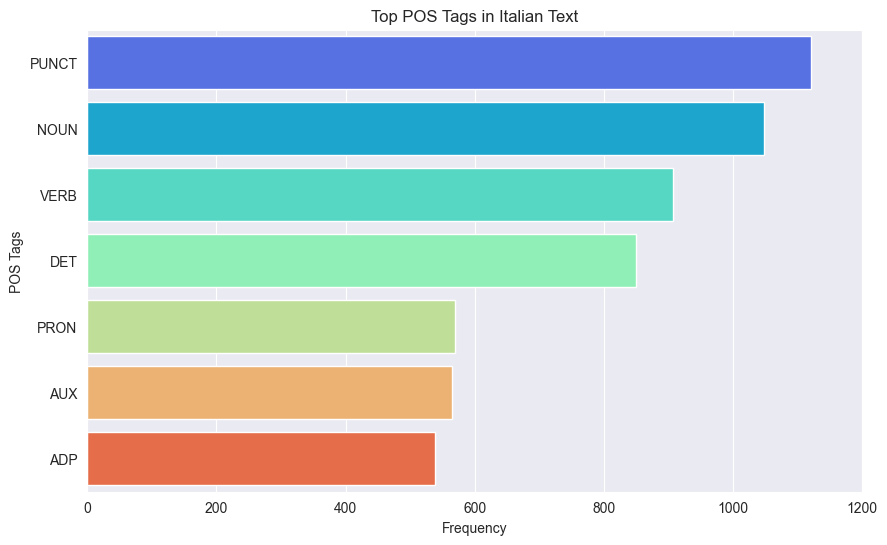

In [5]:
plot_parts_of_speech_barchart(df, 'italian', 'it')

Counter({'PUNCT': 1105, 'PRON': 1071, 'NOUN': 937, 'VERB': 923, 'DET': 634, 'AUX': 565, 'ADP': 517, 'ADV': 420, 'ADJ': 413, 'PROPN': 333, 'SCONJ': 76, 'NUM': 52, 'CCONJ': 41, 'SYM': 7, 'INTJ': 4})


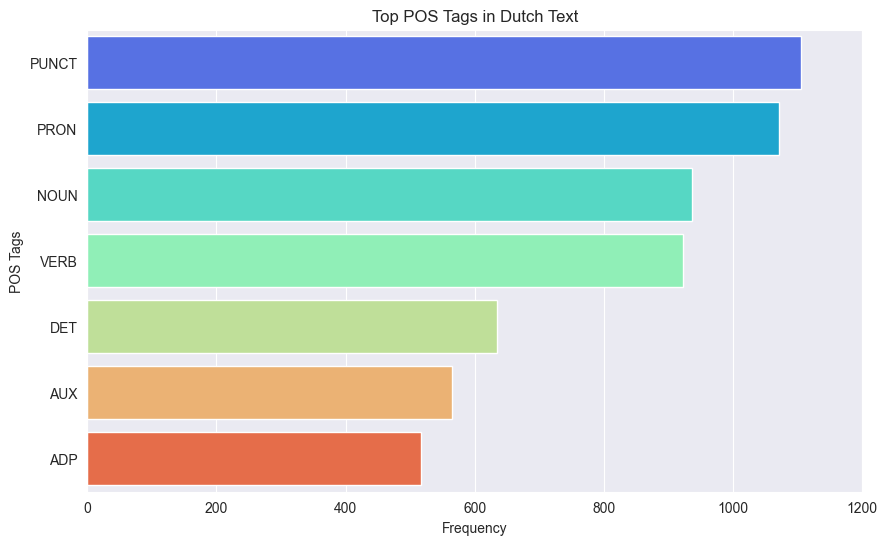

In [6]:
plot_parts_of_speech_barchart(df, 'dutch', 'nl')

## Sentiment Analysis and Text Complexity

In [8]:
import spacy
from textstat import textstat
import keras
import tensorflow as tf
import it_core_news_sm
from sentita import calculate_polarity

results, polarities = calculate_polarity(df['italian'].tolist())

df['positive_score'] = [p[0] for p in polarities]
df['negative_score'] = [p[1] for p in polarities]

# Classify sentences as Positive, Negative, or Neutral
def classify_sentiment(row):
    if row['positive_score'] > row['negative_score']:
        return 'Positive'
    elif row['negative_score'] > row['positive_score']:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df.apply(classify_sentiment, axis=1)

C:\Users\fabia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=('*',)
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step

lascia in pace tom.  - opos:  0.027371822  - oneg:  0.011811985
è venuto di persona.  - opos:  0.3089302  - oneg:  0.16518089
rimaniamo sposate.  - opos:  0.12918118  - oneg:  0.7640997
ha due sorelle.  - opos:  0.3572941  - oneg:  0.048744284
vuole sposare mia figlia.  - opos:  0.12844856  - oneg:  0.17500007
sai quand'è il compleanno di tom?  - opos:  0.31611517  - oneg:  0.027482755
sono un po' malato.  - opos:  0.0456625  - oneg:  0.9358933
siamo dentro.  - opos:  0.19192609  - oneg:  0.7782443
tracci una linea da a a b.  - opos:  0.0050600395  - oneg:  0.0041000983
parlo seriamente.  - opos:  0.03853664  - oneg:  0.95850265
sei pronta a iniziare?  - opos:  0.9235166  - oneg:  0.03532928
comprai un paio di forbici.  - opos:  0.20417608  - oneg:  0.17497937
sono furioso.  - opos:  0.08439842  - oneg:  0.70998126
posso estendere il mio soggiorno?  - opos:  0.6086755  - oneg:  0.10861465
perse la vita in un incidente stradale.  - opos:  0.00673

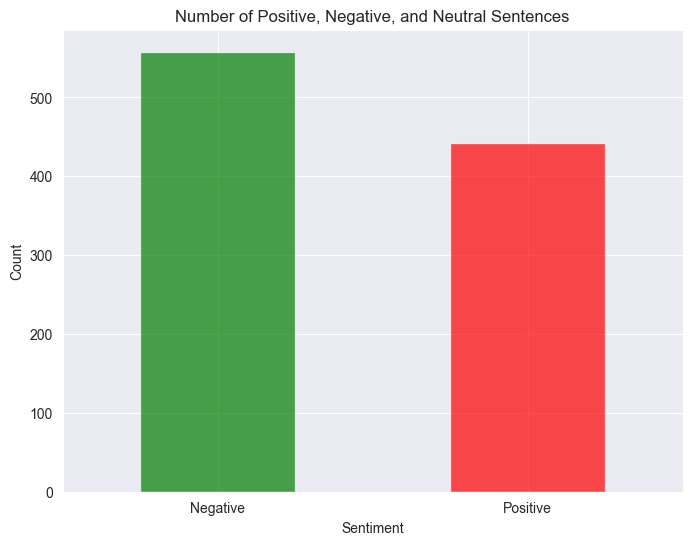

In [9]:
# Count of Positive, Negative, and Neutral Sentences
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'], alpha=0.7)
plt.title('Number of Positive, Negative, and Neutral Sentences')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

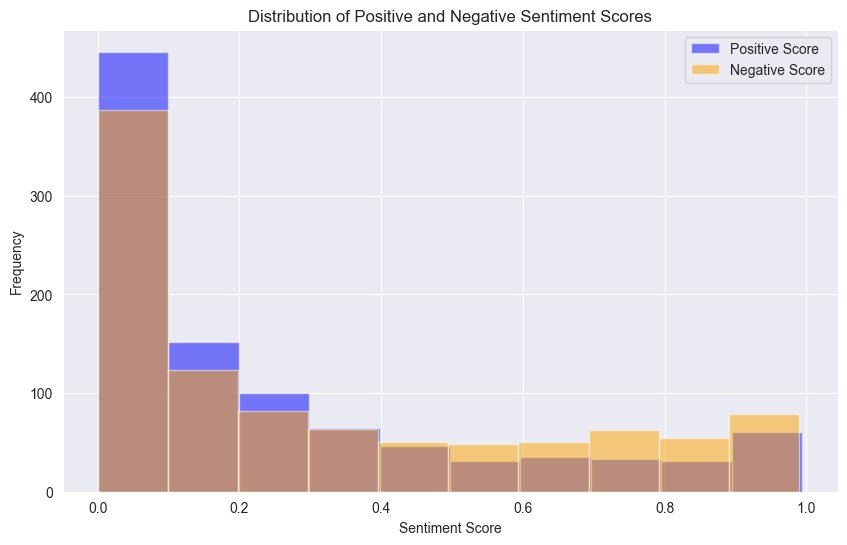

In [10]:
# Distribution of Positive and Negative Scores
plt.figure(figsize=(10, 6))
plt.hist(df['positive_score'], bins=10, alpha=0.5, label='Positive Score', color='blue')
plt.hist(df['negative_score'], bins=10, alpha=0.5, label='Negative Score', color='orange')
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

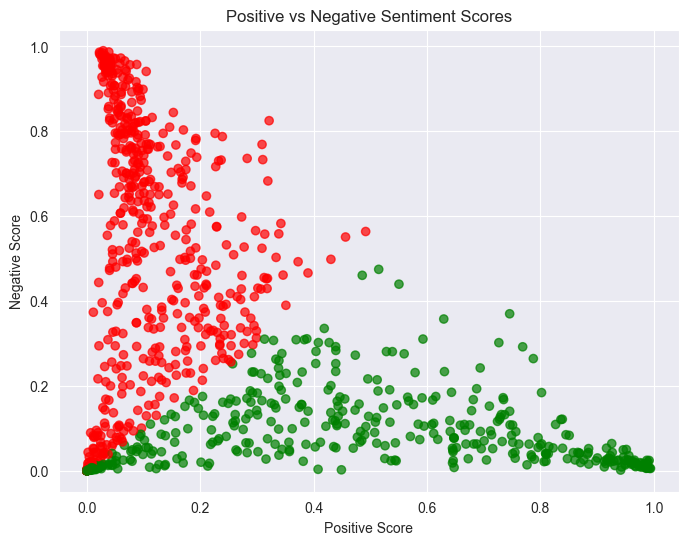

In [11]:
# Scatter Plot of Positive vs Negative Scores
plt.figure(figsize=(8, 6))
plt.scatter(df['positive_score'], df['negative_score'], c=df['sentiment'].map({'Positive': 'green', 'Negative': 'red', 'Neutral': 'gray'}), alpha=0.7)
plt.title('Positive vs Negative Sentiment Scores')
plt.xlabel('Positive Score')
plt.ylabel('Negative Score')
plt.grid(True)
plt.show()

In [12]:
import spacy
import it_core_news_sm

nlp = it_core_news_sm.load()

def compute_text_complexity(text):
    doc = nlp(text)
    
    # Words, characters, sentences
    words = [token for token in doc if token.is_alpha]
    num_words = len(words)
    num_characters = sum(len(token.text) for token in words)
    num_sentences = len(list(doc.sents))
    
    # Average metrics
    avg_word_length = num_characters / num_words if num_words > 0 else 0
    avg_sentence_length = num_words / num_sentences if num_sentences > 0 else 0
    
    # Gulpease Index (only for Italian)
    if num_words > 0:
        gulpease = 89 - (10 * num_characters / num_words) + (300 * num_sentences / num_words)
    else:
        gulpease = 0
    
    # POS counts
    pos_counts = doc.count_by(spacy.attrs.POS)
    nouns = pos_counts.get(nlp.vocab.strings['NOUN'], 0)
    verbs = pos_counts.get(nlp.vocab.strings['VERB'], 0)
    
    return {
        "words": num_words,
        "characters": num_characters,
        "sentences": num_sentences,
        "avg_word_length": avg_word_length,
        "avg_sentence_length": avg_sentence_length,
        "gulpease_index": gulpease,
        "noun_percentage": nouns / num_words if num_words > 0 else 0,
        "verb_percentage": verbs / num_words if num_words > 0 else 0,
    }

# Apply to a DataFrame
df['complexity_metrics'] = df['italian'].apply(compute_text_complexity)
complexity_df = pd.json_normalize(df['complexity_metrics'])

# Merge complexity metrics back
df = pd.concat([df, complexity_df], axis=1)

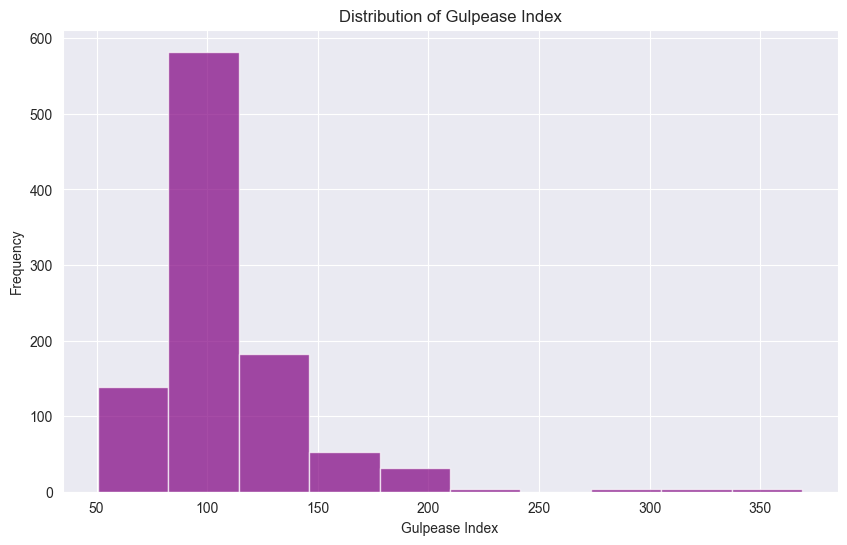

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['gulpease_index'], bins=10, color='purple', alpha=0.7)
plt.title('Distribution of Gulpease Index')
plt.xlabel('Gulpease Index')
plt.ylabel('Frequency')
plt.show()

In [18]:
# number of sentences with less than 80 gulpease index
low_gulpease = df[df['gulpease_index'] < 60]
low_gulpease.shape[0]

8

In [19]:
# number of sentences with less than 80 gulpease index
low_gulpease = df[df['gulpease_index'] < 80]
low_gulpease.shape[0]

100